## Work
+ 請將 Epoch 加到 500 個以及 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [0]:
# 從網路即時下載CIFAR10⼩圖像，數據集涵蓋50,000張32x32彩⾊色訓練圖像及10,000張測試圖像，並且標註超過10個類別
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# 查詢檔案維度資訊
print(f"Shape of x_train: {x_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of x_test: {x_test.shape}")
print(f"Shape of y_test: {y_test.shape}")

Using TensorFlow backend.


170500096/170498071 [==============================] - 4s 0us/step
Shape of x_train: (50000, 32, 32, 3)
Shape of y_train: (50000, 1)
Shape of x_test: (10000, 32, 32, 3)
Shape of y_test: (10000, 1)


In [0]:
# 將資料從圖形 (RGB) 轉為向量 (Single Vector) 並進行標準化
x_train = x_train.reshape((len(x_train), -1)) / 255.
x_test = x_test.reshape((len(x_test), -1)) / 255.
print(f"Shape of x_train: {x_train.shape}")
print(f"Shape of x_test: {x_test.shape}")


# 將目標轉為 one-hot encoding
from keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of x_train: (50000, 3072)
Shape of x_test: (10000, 3072)
Shape of y_train: (50000, 10)
Shape of y_test: (10000, 10)


In [0]:
# 建立一個有三層隱藏層之神經網路
from keras import layers, models

def build_model():
    model = models.Sequential()
    model.add(layers.Dense(512, activation='relu', input_shape=(x_train.shape[-1],)))
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))
    return model
  
model = build_model()
print(model.summary())




Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
None


In [0]:
# Compiling the model
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=500, batch_size=256, validation_data=(x_test, y_test), shuffle=True, verbose=0)

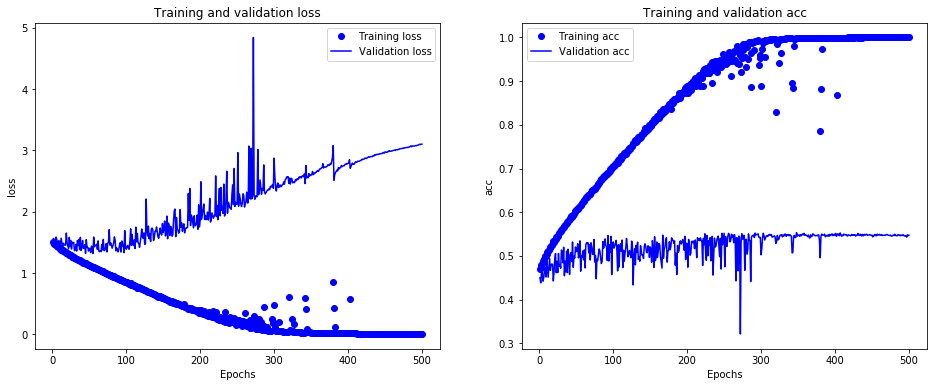

In [0]:
# 以視覺畫方式檢視訓練過程
import matplotlib.pyplot as plt
%matplotlib inline

epochs = range(1, len(history.history['loss']) + 1)

rows, cols = 1, 2
figure, ax = plt.subplots(rows, cols, figsize=(16,6))
for i, score in enumerate(['loss', 'acc']):
    plt.subplot(1, 2, i+1)
    plt.plot(epochs, history.history[score], 'bo', label='Training '+score)
    plt.plot(epochs, history.history['val_'+score], 'b', label='Validation '+score)
    plt.title('Training and validation '+score)
    plt.xlabel('Epochs')
    plt.ylabel(score)
    plt.legend()